#Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('21-Pokemon.csv')
df = df.drop(columns=["#", "Name"])
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.shape

(800, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


In [ ]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
print(df['Legendary'].value_counts())
print(df['Legendary'].value_counts(normalize=True)*100)

Legendary
False    735
True      65
Name: count, dtype: int64
Legendary
False    91.875
True      8.125
Name: proportion, dtype: float64


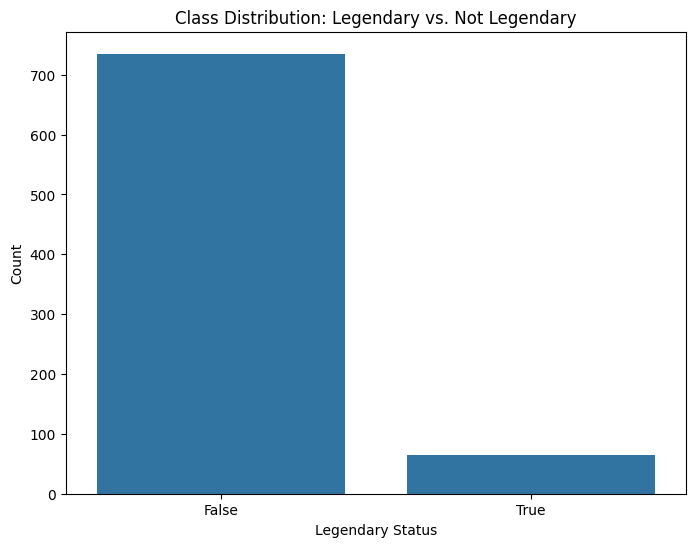

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(x='Legendary', data=df)
plt.title("Class Distribution: Legendary vs. Not Legendary")
plt.xlabel("Legendary Status")
plt.ylabel("Count")

plt.show()


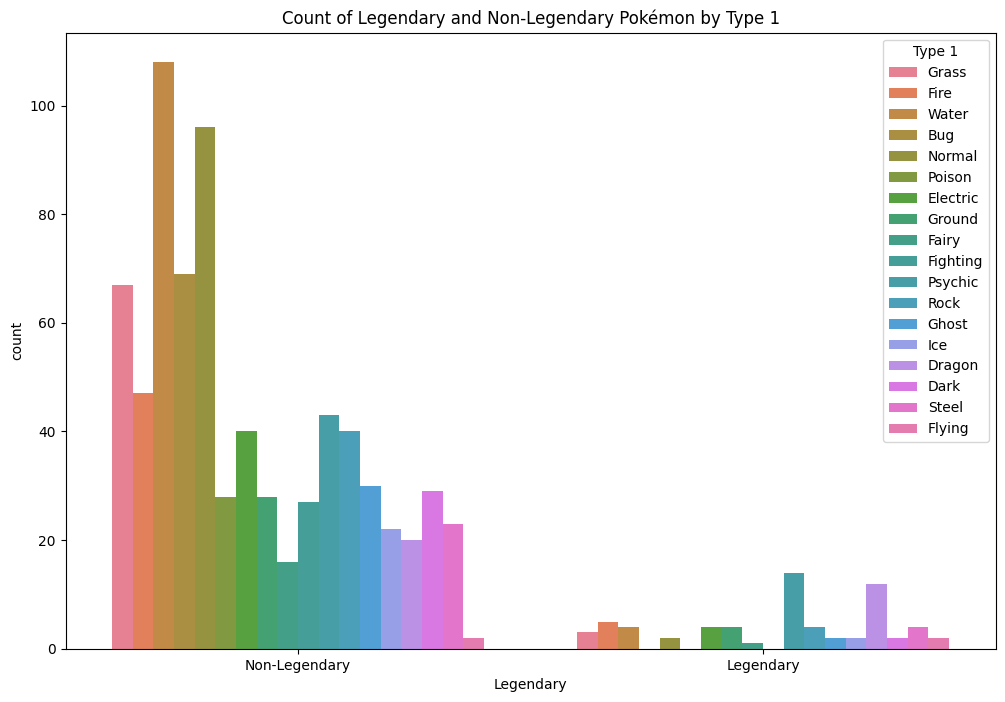

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='Legendary', hue='Type 1', data=df, ax=ax)
plt.title("Count of Legendary and Non-Legendary Pokémon by Type 1")
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.show()

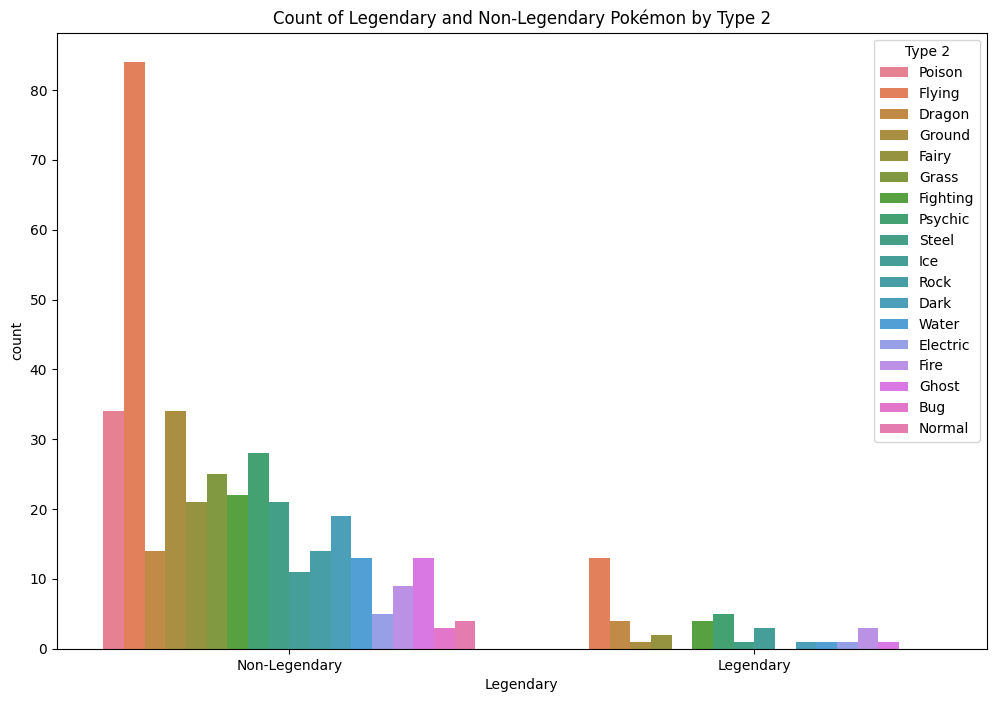

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='Legendary', hue='Type 2', data=df, ax=ax)
plt.title("Count of Legendary and Non-Legendary Pokémon by Type 2")
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.show()

/tmp/ipython-input-20-1753379722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-20-1753379722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


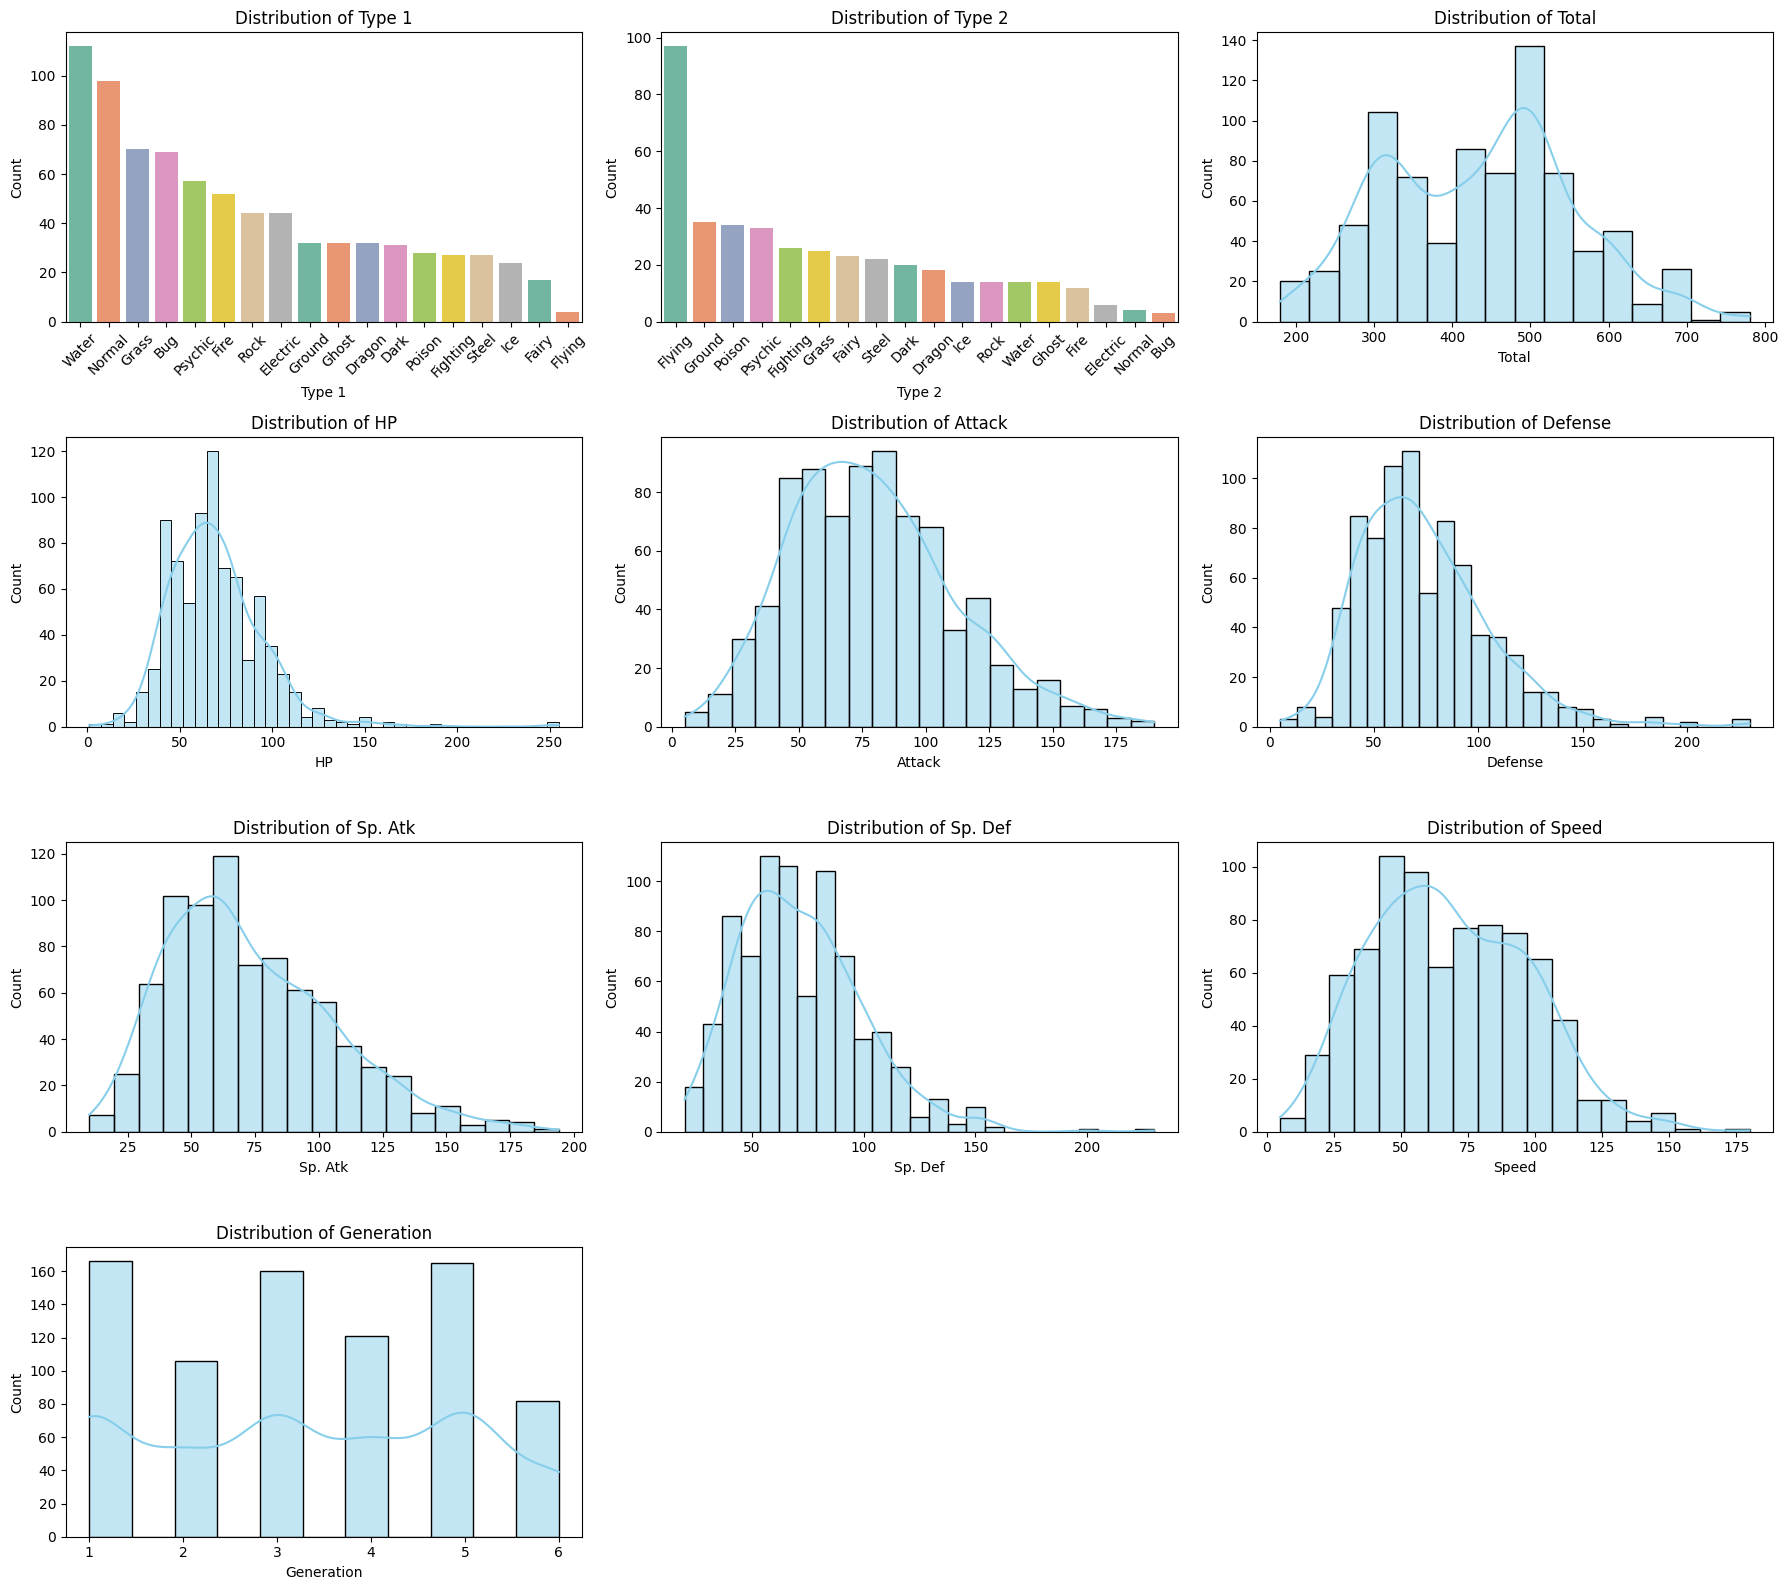

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'Legendary' column
cols_to_plot = [col for col in df.columns if col != 'Legendary']

# Determine subplot grid
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols  # ceiling division

# Set figure size based on number of columns
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Plot each column
for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)

    if df[col].dtype == 'object':
        # Categorical column (e.g., 'Type 1', 'Type 2')
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
        plt.xticks(rotation=45)
    else:
        # Numerical column
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
# plotPerColumnDistribution(df, 10, 4)

#Heatmap

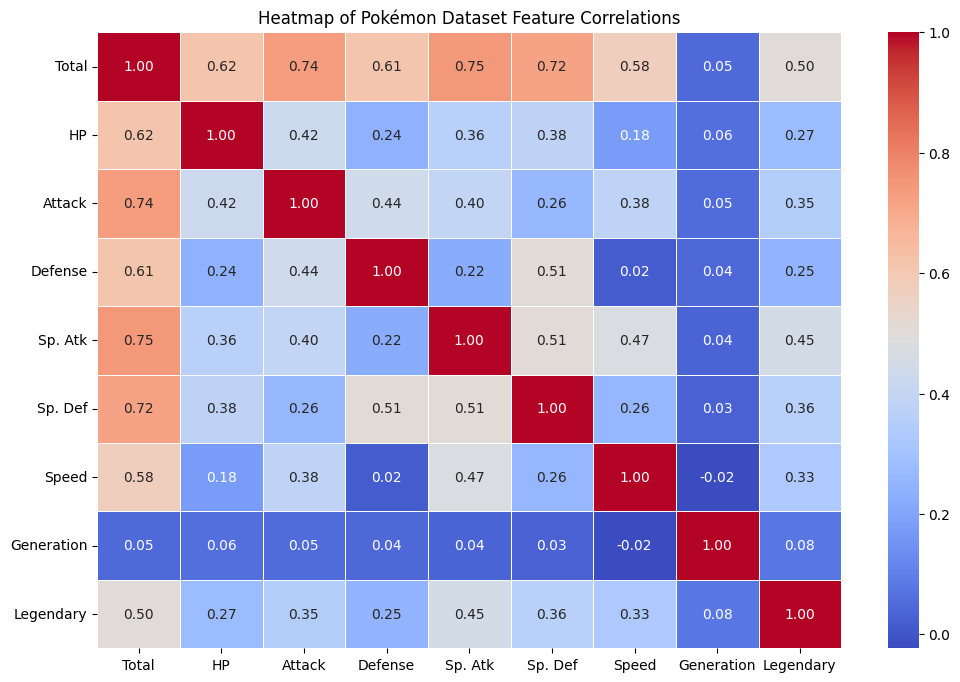

In [ ]:
# Optional: Drop non-numeric columns if any still remain
df['Legendary'] = df['Legendary'].astype(int)
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Heatmap of Pokémon Dataset Feature Correlations")

# Show plot
plt.show()

#Dropping Generation Column

In [ ]:
# df = df.drop(columns=["Generation"])

#Bosplotting

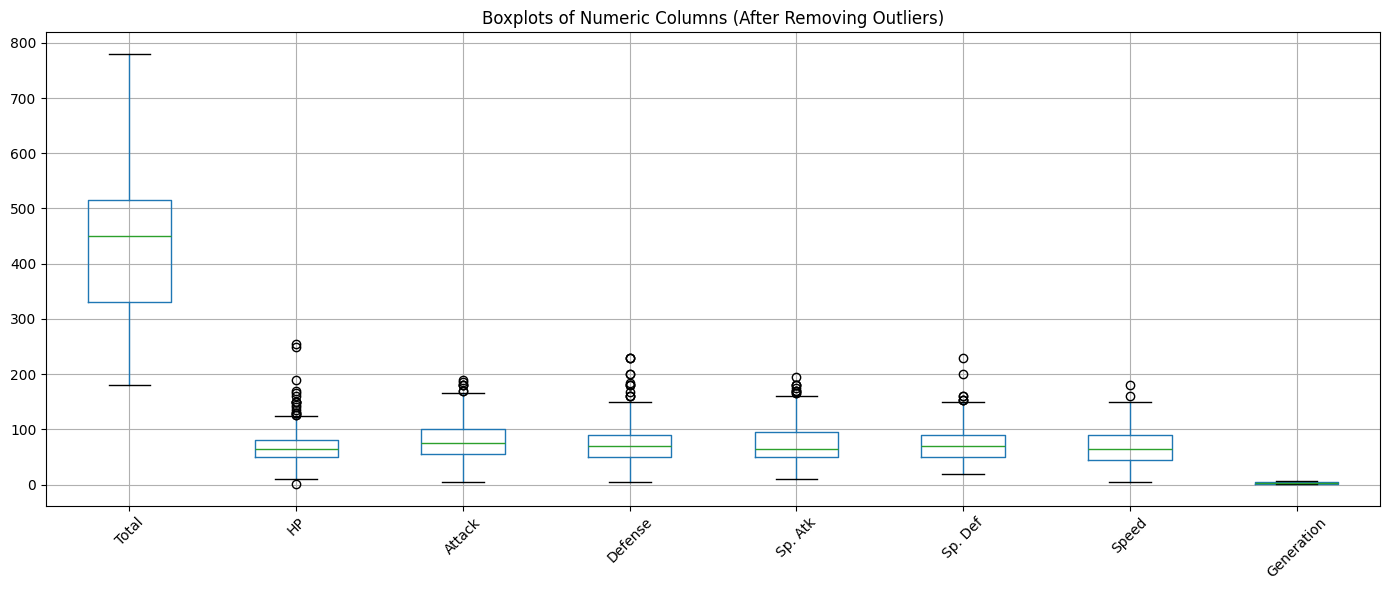

In [ ]:
import matplotlib.pyplot as plt
box_all=df.iloc[:,:-1]
box_one=df.iloc[:,-1]
# plt.figure(figsize=(18, 8))
# box_all.plot.box(figsize=(18, 8), rot=45, title="Boxplot of Numeric Columns")
# plt.show()

plt.figure(figsize=(14, 6))
box_all.boxplot(rot=45)
plt.title("Boxplots of Numeric Columns (After Removing Outliers)")
plt.tight_layout()
plt.show()

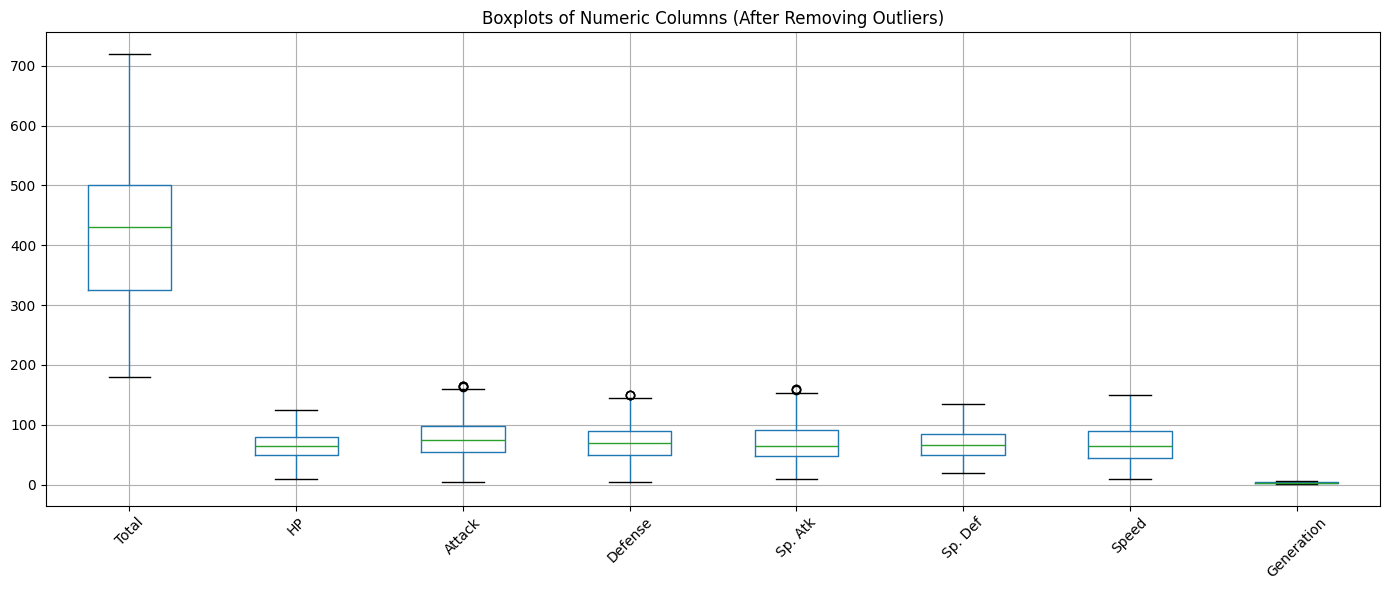

In [ ]:
import matplotlib.pyplot as plt


# Make a copy so original data remains intact
df_filtered = df.copy()
df_filtered = df_filtered.drop(columns=["Legendary"])
# Select only numerical columns
numeric_cols = df_filtered.select_dtypes(include='number').columns

# Remove outliers from all numeric columns using IQR
for col in numeric_cols:
    q1 = df_filtered[col].quantile(0.25)
    q3 = df_filtered[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

# Plot boxplots of all numeric columns after removing outliers
plt.figure(figsize=(14, 6))
df_filtered[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numeric Columns (After Removing Outliers)")
plt.tight_layout()
plt.show()



3. LEGENDARY vs NON-LEGENDARY STAT PATTERNS
---------------------------------------------


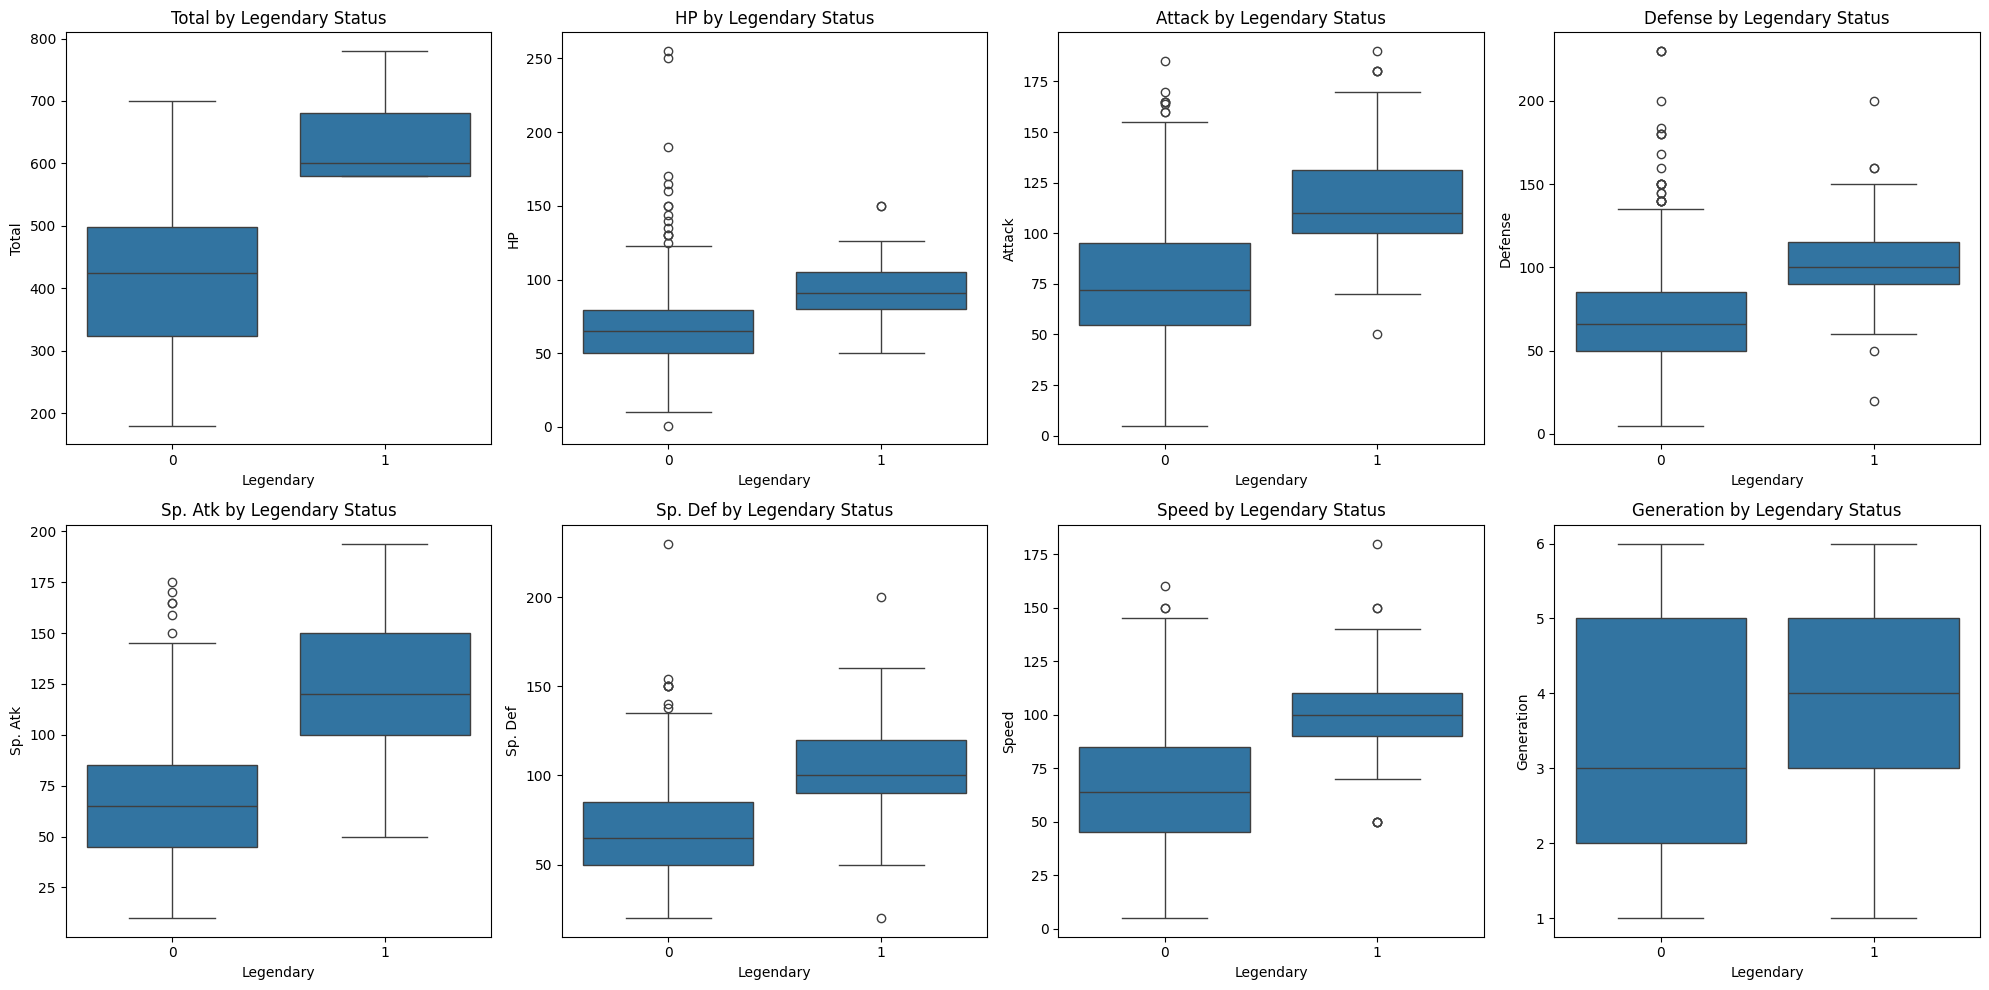

In [ ]:
# 3. LEGENDARY VS NON-LEGENDARY COMPARISON
print(f"\n3. LEGENDARY vs NON-LEGENDARY STAT PATTERNS")
print("-" * 45)

# Create comparison plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Box plot comparing Legendary vs Non-Legendary
    sns.boxplot(data=df, x='Legendary', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Legendary Status')
    axes[i].set_xlabel('Legendary')
    axes[i].set_ylabel(col)

# Remove empty subplots if any
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# 5. CORRELATION ANALYSIS
# 1. Convert Legendary to numeric
df_corr = df.copy()
df_corr['Legendary_numeric'] = df_corr['Legendary'].astype(int)

# 2. Identify numeric columns excluding 'Legendary'
numeric_cols_for_corr = [col for col in df_corr.select_dtypes(include=np.number).columns if col not in ['Legendary', 'Legendary_numeric']]

# 3. Subset including Legendary_numeric once
df_corr_subset = df_corr[numeric_cols_for_corr + ['Legendary_numeric']]

# 4. Compute correlation matrix and sort
corr_matrix_subset = df_corr_subset.corr()
correlations = corr_matrix_subset['Legendary_numeric'].sort_values(ascending=False)

# 5. Print
print(f"\n CORRELATION WITH LEGENDARY STATUS")
print("-" * 30)
print("Correlation with Legendary Status:")
for stat, corr in correlations.items():
    if stat != 'Legendary_numeric':
        print(f"{stat:12}: {corr:6.3f}")



 CORRELATION WITH LEGENDARY STATUS
------------------------------
Correlation with Legendary Status:
Total       :  0.502
Sp. Atk     :  0.449
Sp. Def     :  0.364
Attack      :  0.345
Speed       :  0.327
HP          :  0.274
Defense     :  0.246
Generation  :  0.080



6. DISTRIBUTION COMPARISON
------------------------------


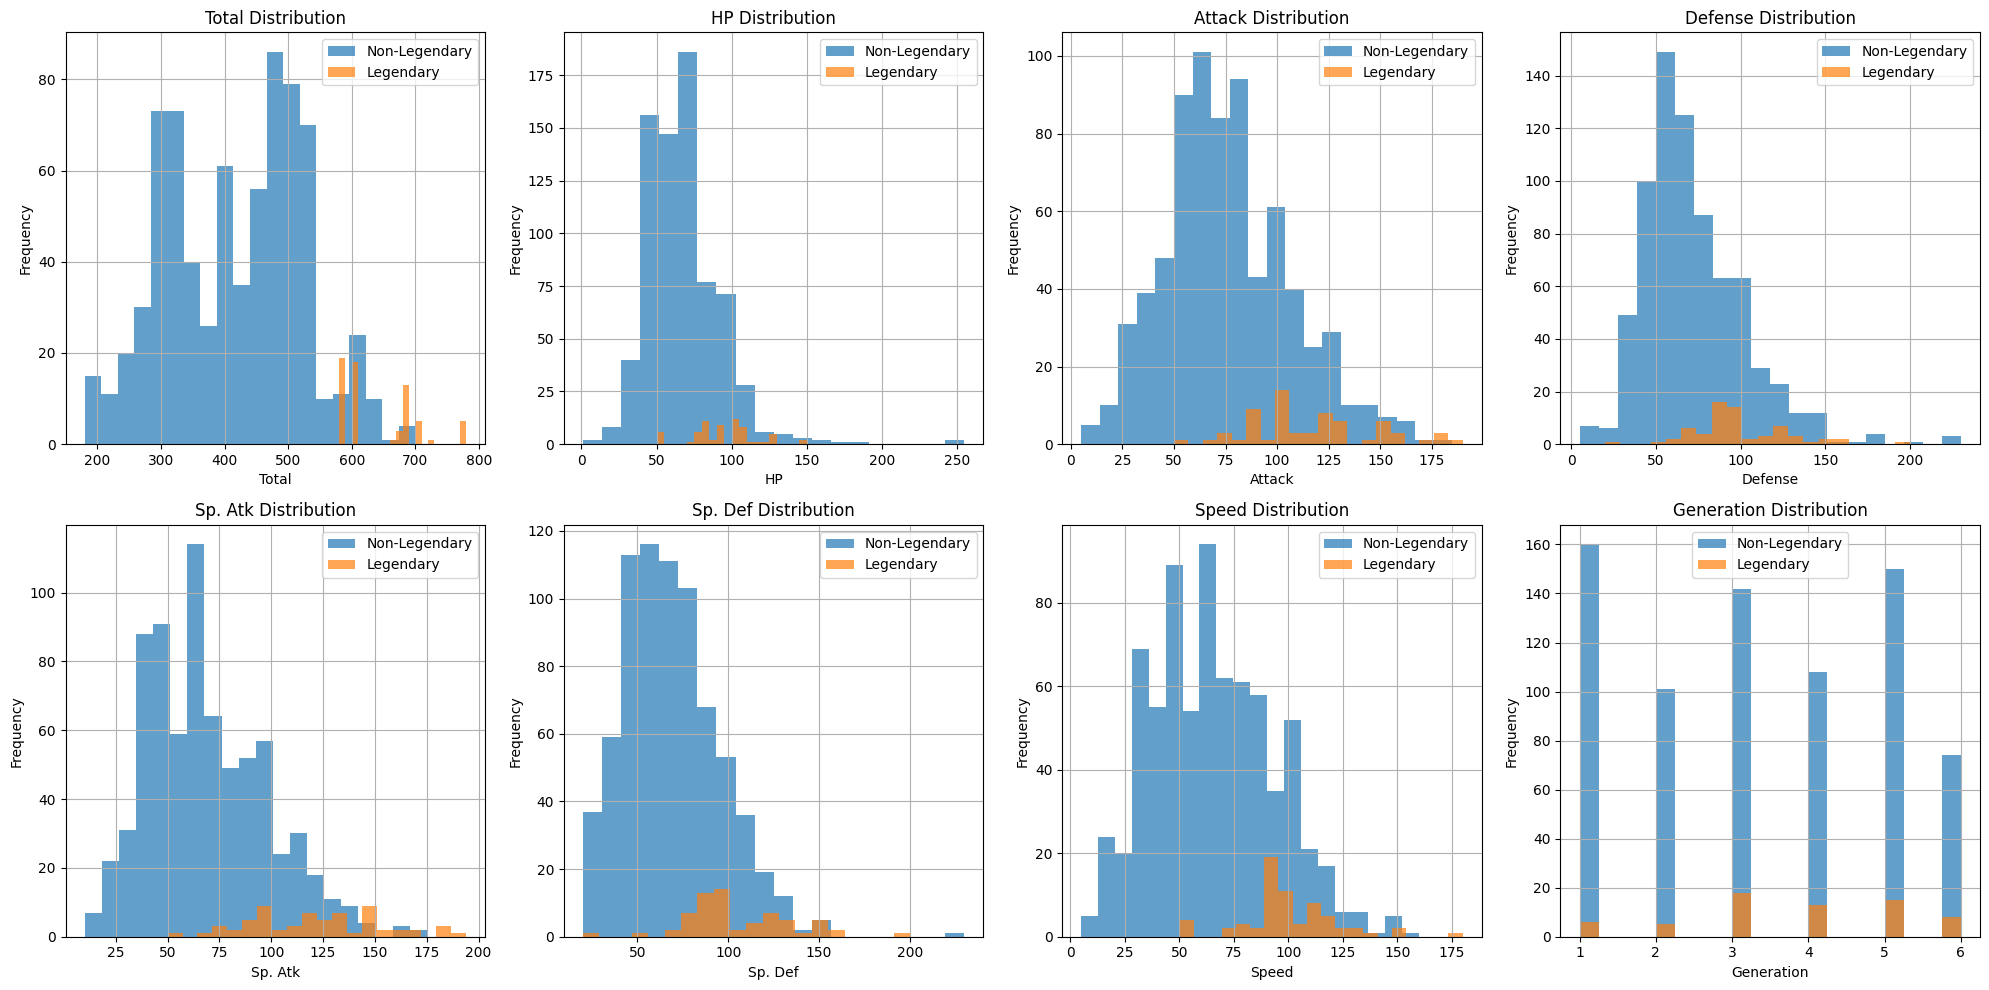

In [ ]:
# 6. DISTRIBUTION PLOTS
print(f"\n6. DISTRIBUTION COMPARISON")
print("-" * 30)

# Create distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histogram with separate colors for Legendary vs Non-Legendary
    df[df['Legendary'] == False][col].hist(ax=axes[i], alpha=0.7, label='Non-Legendary', bins=20)
    df[df['Legendary'] == True][col].hist(ax=axes[i], alpha=0.7, label='Legendary', bins=20)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Remove empty subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Separating Feature X and Tagert y

In [ ]:
X = df.drop(columns=["Legendary"])
y = df["Legendary"].astype(int)

#Identifying Missing Values


In [ ]:
missing_data= df.isnull().sum()
print("missing_data : \n",missing_data)

missing_data : 
 Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


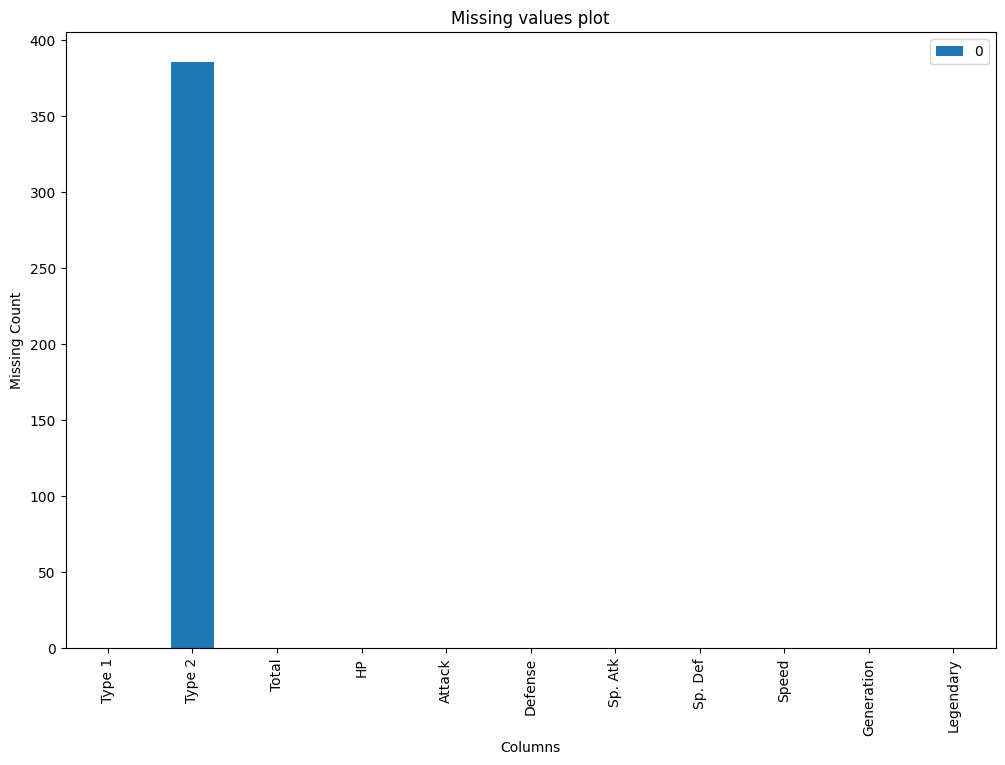

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))  # create figure and axes with desired size

df.isnull().sum().reset_index().plot(kind='bar', x='index', y=0, ax=ax)

ax.set_title('Missing values plot')
ax.set_xlabel('Columns')
ax.set_ylabel('Missing Count')

plt.show()


In [ ]:
categorical_features = ["Type 1", "Type 2"]
numerical_features = [col for col in X.columns if col not in categorical_features]

X[categorical_features] = X[categorical_features].fillna("Missing")

missing_data= X[categorical_features].isnull().sum()
print("missing_data : \n",missing_data)

missing_data : 
 Type 1    0
Type 2    0
dtype: int64


#Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat_encoded = encoder.fit_transform(X[categorical_features])

#Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_features])

#Combining All Features Together

In [ ]:
X_processed = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

#Spliting Into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42)

#Balancing the Class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking new class distribution
print(pd.Series(y_train_resampled).value_counts())

Legendary
0    588
1    588
Name: count, dtype: int64


#Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=500, random_state=42)

#Making Predictions and Evaluate the Model

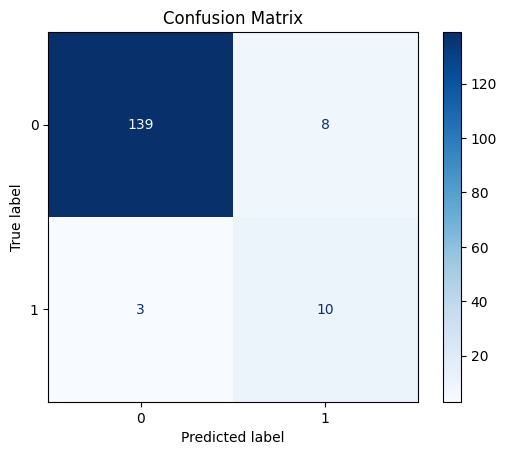

Accuracy: 0.93125

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       147
           1       0.56      0.77      0.65        13

    accuracy                           0.93       160
   macro avg       0.77      0.86      0.80       160
weighted avg       0.94      0.93      0.94       160



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



#Predicting with test data


In [ ]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities (optional, useful for ROC curve, thresholds, etc.)
y_test_prob = model.predict_proba(X_test)[:, 1]  # probability for class 1 (e.g., Legendary = 1)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.965625
Test Accuracy: 0.93125


In [ ]:
# Step 1: Get the indices of test samples (make sure X_test came from df)
test_indices = X_test.index if hasattr(X_test, 'index') else None

# Step 2: Create results DataFrame
if test_indices is not None:
    results = df.loc[test_indices].copy()
    results['Actual Legendary'] = y_test
    results['Predicted Legendary'] = y_test_pred
    results['Probability'] = y_test_prob
else:
    # If you lost indices (e.g., after PCA or SMOTE), recreate DataFrame from scratch
    results = pd.DataFrame({
        'Actual Legendary': y_test,
        'Predicted Legendary': y_test_pred,
        'Probability': y_test_prob
    })
if 'Name' in results.columns:
    print(results[['Name', 'Actual Legendary', 'Predicted Legendary', 'Probability']].sort_values(by='Probability', ascending=False).head(10))
else:
    print(results.head())



     Actual Legendary  Predicted Legendary   Probability
249                 0                    0  2.615606e-03
128                 0                    0  1.877644e-04
563                 0                    0  1.868805e-09
341                 0                    0  1.948538e-03
785                 0                    0  4.180687e-03


#Feature Importance

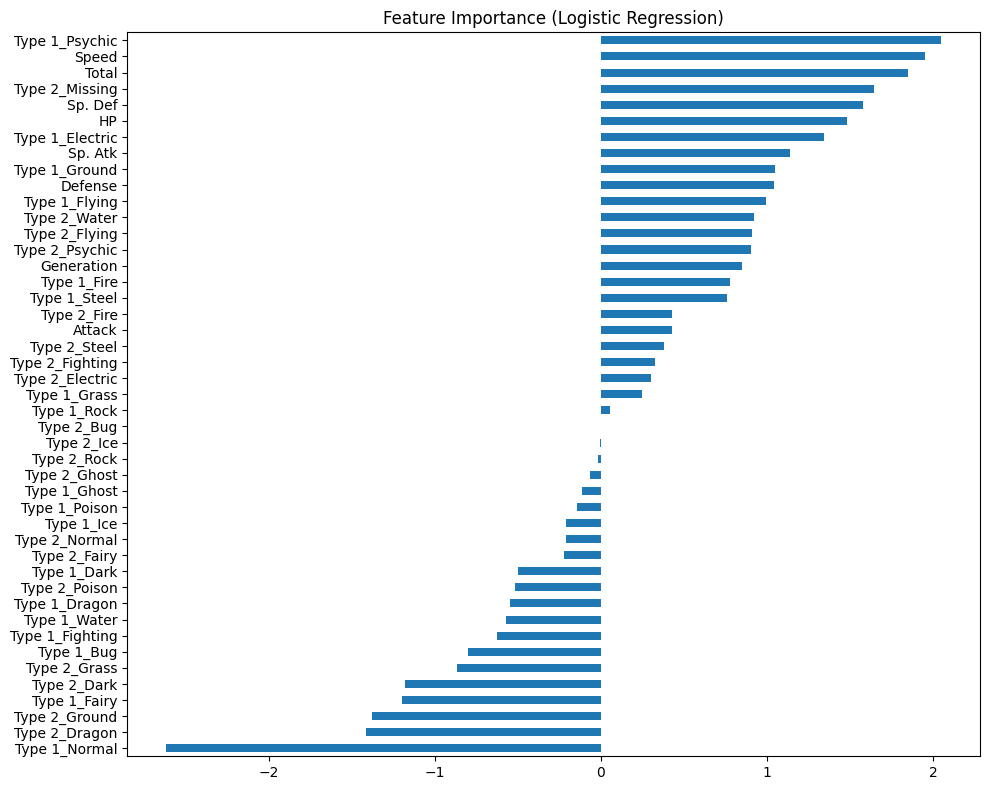

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Get coefficients from the sklearn LogisticRegression model

# coefficients = model.coef_[0]
# # Get feature names from the processed DataFrame (assuming order is preserved)
# feature_names = X_processed_df.columns

# # Create a pandas Series for easy plotting
# feature_importance = pd.Series(coefficients, index=feature_names)

# # Plot
# plt.figure(figsize=(10, 8))
# feature_importance.sort_values().plot(kind='barh', color='lightgreen')
# plt.title("Feature Importance (Logistic Regression Coefficients - scikit-learn)")
# plt.xlabel("Coefficient Value")
# plt.axvline(x=0, color='gray', linestyle='--')
# plt.tight_layout()
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get coefficients from the sklearn LogisticRegression model

coefficients = model.coef_[0]
# Get feature names from the processed DataFrame (assuming order is preserved)
# 1. Get numeric feature names
numerical_features = [col for col in X.columns if col not in ["Type 1", "Type 2"]]

# 2. Get encoded categorical feature names
categorical_feature_names = encoder.get_feature_names_out(["Type 1", "Type 2"])

# 3. Combine all feature names
feature_names = np.concatenate([numerical_features, categorical_feature_names])

# 4. Get coefficients
coefficients = model.coef_[0]

# 5. Plot
import matplotlib.pyplot as plt
import pandas as pd

coef_series = pd.Series(coefficients, index=feature_names)
coef_series.sort_values().plot(kind='barh', figsize=(10, 8), title="Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.show()



#Cross Validation for logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Set up logistic regression model
model = LogisticRegression(max_iter=1000)

# Set up cross-validation (e.g., 5-fold stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and compute accuracy
scores = cross_val_score(model, X_processed, y, cv=cv, scoring='accuracy')

# Print results
print("Cross-validation accuracies:", scores)
print("Mean accuracy: {:.3f}".format(scores.mean()))


Cross-validation accuracies: [0.95    0.94375 0.94375 0.9625  0.94375]
Mean accuracy: 0.949


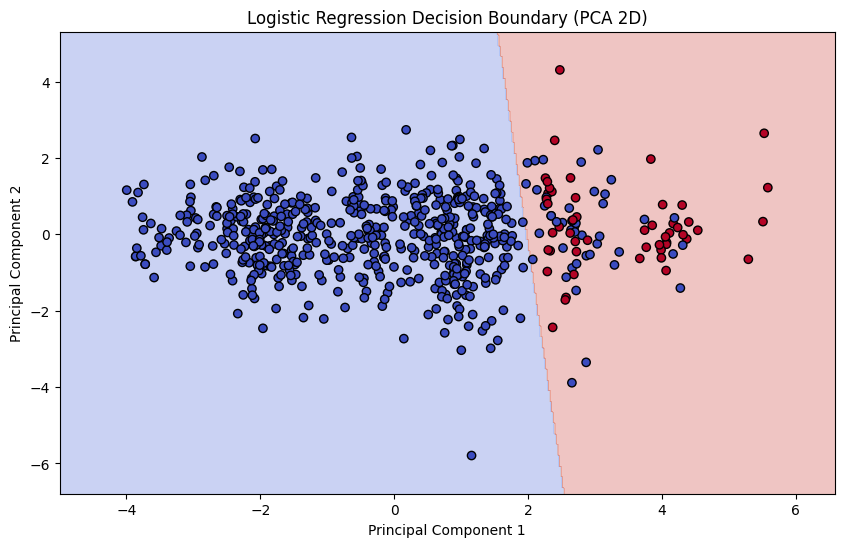

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Reduce features to 2D for plotting (only for visualization)
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Train logistic regression on 2D data
model_2D = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
model_2D.fit(X_train_2D, y_train)

# Plotting decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Decision Boundary (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


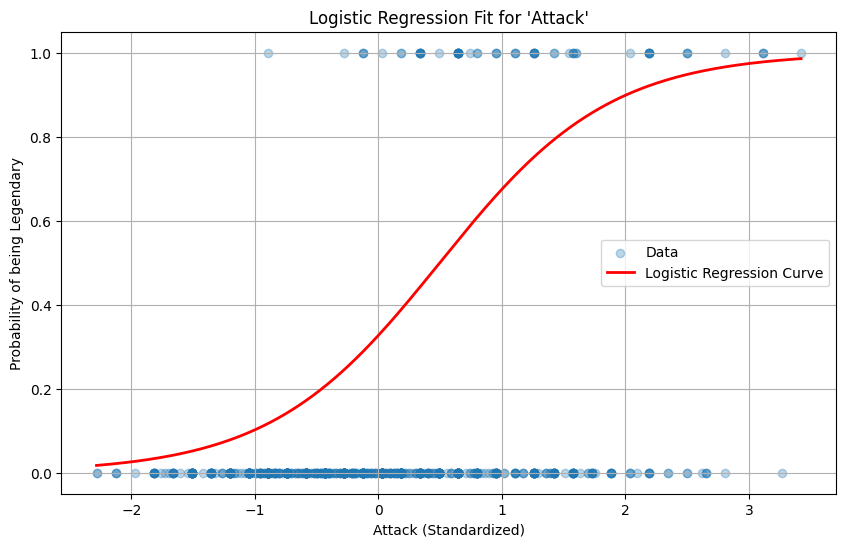

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Select a single numerical feature (e.g., "Attack") from the original dataframe
feature_name = "Attack"  # You can change this to "Speed", "HP", etc.
X_single = df[[feature_name]].values  # Use original df
y_single = df["Legendary"].astype(int).values # Use original df

# Standardize the selected feature (since you scaled in main training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_single)

# Fit logistic regression model
model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
model.fit(X_scaled, y_single)

# Create a range of values for plotting the sigmoid curve
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_plot)[:, 1]  # Probabilities for class 1

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_single, alpha=0.3, label="Data")
plt.plot(X_plot, y_prob, color="red", linewidth=2, label="Logistic Regression Curve")
plt.title(f"Logistic Regression Fit for '{feature_name}'")
plt.xlabel(f"{feature_name} (Standardized)")
plt.ylabel("Probability of being Legendary")
plt.legend()
plt.grid(True)
plt.show()

#Statsmodel.api

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Target and features
y = df["Legendary"].astype(int)
X = df.drop(columns=["Legendary"])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=["Type 1", "Type 2"], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])


# Ensure all data is numeric
X_encoded = X_encoded.astype(int)

# Add constant for intercept
X_sm = sm.add_constant(X_encoded)

# Fit logistic regression
model = sm.Logit(y, X_sm)
result = model.fit_regularized()

# Show summary
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06418377478047113
            Iterations: 396
            Function evaluations: 396
            Gradient evaluations: 396
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  800
Model:                          Logit   Df Residuals:                      757
Method:                           MLE   Df Model:                           42
Date:                Fri, 04 Jul 2025   Pseudo R-squ.:                  0.7722
Time:                        06:14:22   Log-Likelihood:                -51.347
converged:                       True   LL-Null:                       -225.45
Covariance Type:            nonrobust   LLR p-value:                 7.429e-50
                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
X_encoded.shape

(800, 42)

#Feature Importance for statsmodel

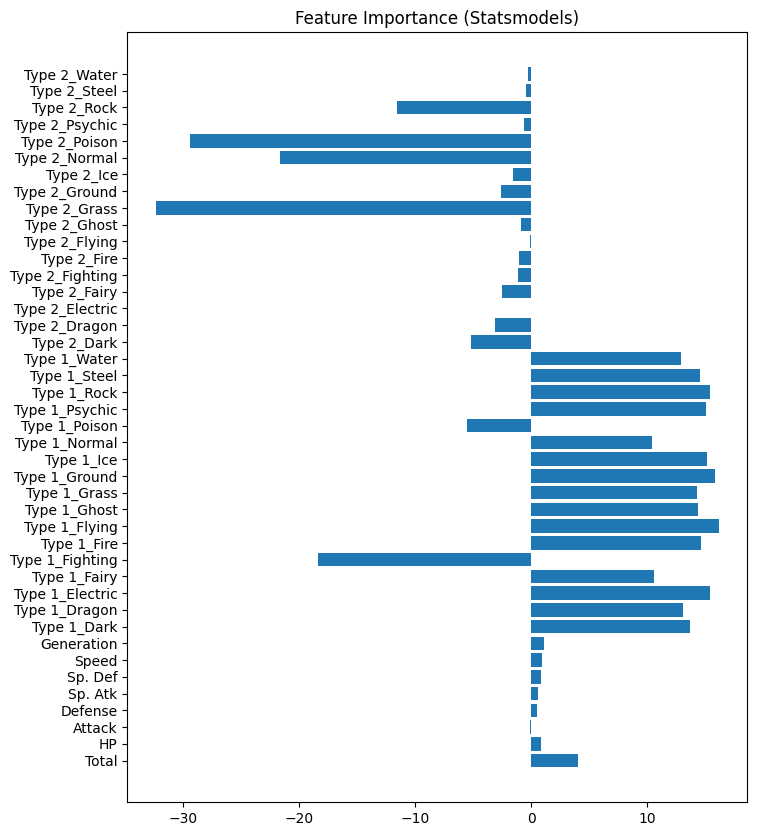

In [ ]:
importance = result.params[1:]  # skip intercept

plt.figure(figsize=(8, 10))
plt.barh(importance.index, importance.values)
plt.title("Feature Importance (Statsmodels)")
plt.show()

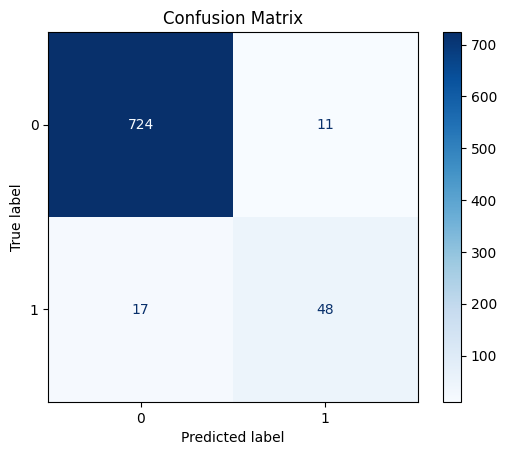

Accuracy: 0.965
F1 Score: 0.7741935483870968
Precision: 0.8135593220338984
Recall: 0.7384615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       735
           1       0.81      0.74      0.77        65

    accuracy                           0.96       800
   macro avg       0.90      0.86      0.88       800
weighted avg       0.96      0.96      0.96       800



In [ ]:
y_pred_prob = result.predict(X_sm)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

#confusion matrix
cm = confusion_matrix(y, y_pred)

# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

#Dropping features

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Target and features
y = df["Legendary"].astype(int)
X = df.drop(columns=["Legendary"])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=["Type 1", "Type 2"], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# Keep as float, do NOT convert to int
X_encoded = X_encoded.astype(int)

# Add constant
X_sm = sm.add_constant(X_encoded)

# Initial model
model = sm.Logit(y, X_sm)
result = model.fit_regularized()

# Get p-values (Note: regularized fit doesn't return p-values, so we refit without regularization)
model_full = sm.Logit(y, X_sm)
result_full = model_full.fit()

# Get features with p <= 0.5
significant_features = result_full.pvalues[result_full.pvalues <= 0.5].index.tolist()

# Refit model with only significant features
X_significant = X_sm[significant_features]
model_final = sm.Logit(y, X_significant)
result_final = model_final.fit()

# Final summary
print(result_final.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06418377478047113
            Iterations: 396
            Function evaluations: 396
            Gradient evaluations: 396
         Current function value: 0.064183
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.497202
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Jul 2025   Pseudo R-squ.:                 -0.7643
Time:                        06:16:19   Log-Likelihood:                -397.76
converged:                       True   LL-Null:                       -225.45
Covariance Type:            nonrobust   LLR p-value:             

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


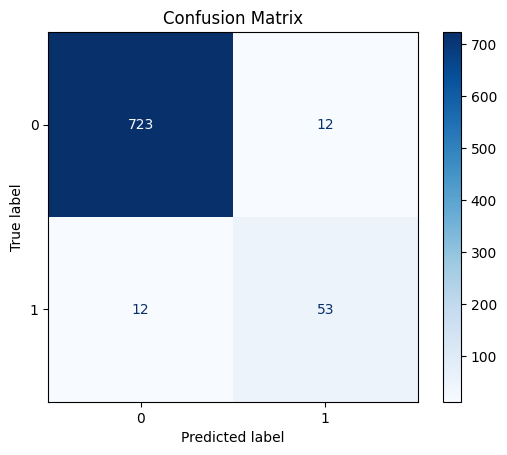

Accuracy: 0.97
F1 Score: 0.8153846153846154
Precision: 0.8153846153846154
Recall: 0.8153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.82      0.82      0.82        65

    accuracy                           0.97       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
y_pred_prob = result.predict(X_sm)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

#confusion matrix
cm = confusion_matrix(y, y_pred)

# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

#Model Comparison

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)

# Corrected accuracy line
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.93125
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.56      0.69      0.62        13

    accuracy                           0.93       160
   macro avg       0.77      0.82      0.79       160
weighted avg       0.94      0.93      0.93       160



#Visualizing Feature Importance

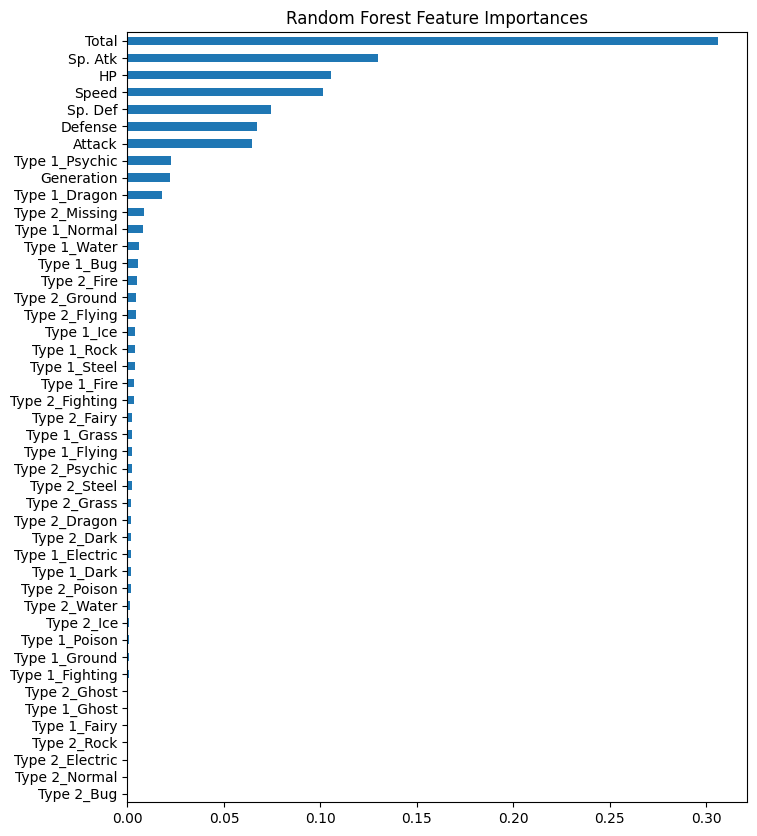

In [ ]:
import seaborn as sns

importances = rf.feature_importances_
feature_names = encoder.get_feature_names_out(categorical_features)
combined_features = numerical_features + list(feature_names)

# Combine importance with feature names
feature_importance = pd.Series(importances, index=combined_features).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,10))
feature_importance.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.show()


#Confusion Matrix for Random Forest

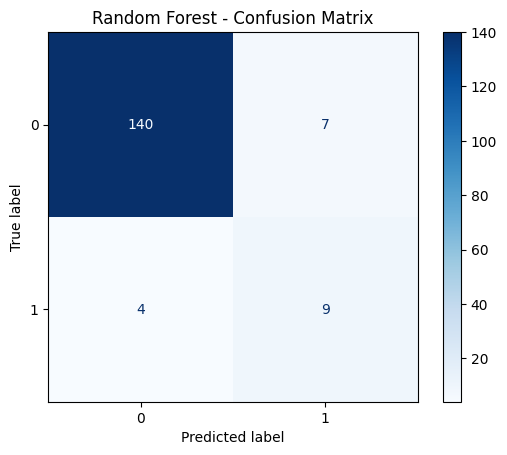

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()


#Cross validation for Random Forest Model

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Set up cross-validation (e.g., 5-fold stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation on resampled data
rf_cv_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print results
print("Random Forest Cross-validation Accuracies:", rf_cv_scores)
print("Mean Accuracy: {:.3f}".format(rf_cv_scores.mean()))


Random Forest Cross-validation Accuracies: [0.99152542 0.98297872 0.99148936 0.9787234  0.96595745]
Mean Accuracy: 0.982


#Visualizing ROC Curve

Logistic Regression ROC-AUC: 0.9524
Random Forest ROC-AUC: 0.9696


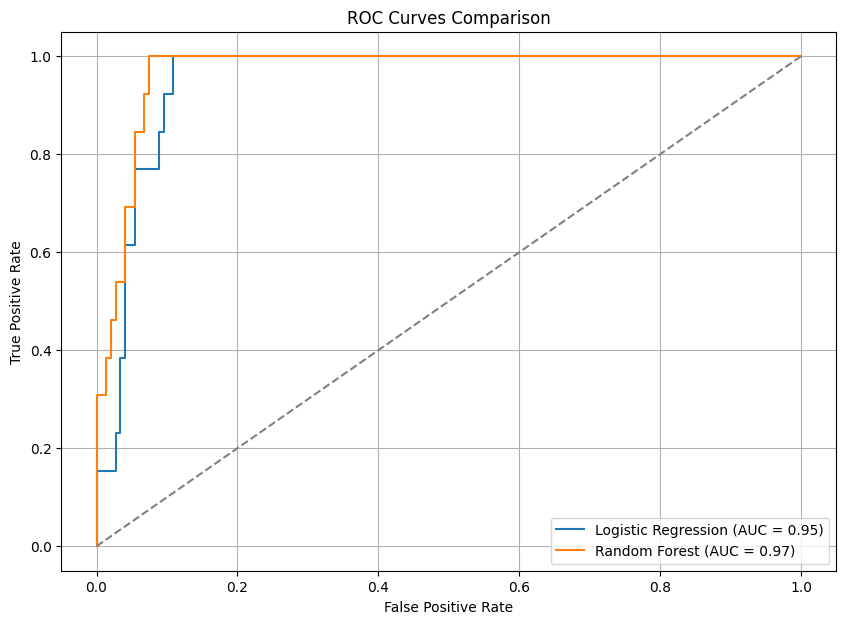

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 1: Train Models
logreg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

logreg.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict Probabilities
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]


# Step 3: ROC-AUC Scores
auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)


print("Logistic Regression ROC-AUC:", round(auc_logreg, 4))
print("Random Forest ROC-AUC:", round(auc_rf, 4))


# Step 4: Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")


plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
